In [1]:
using Revise
includet("job.jl")

Precompiling packages...
  13680.5 ms  ✓ SSMCMain
  1 dependency successfully precompiled in 17 seconds. 528 already precompiled.


In [2]:
using CairoMakie

In [3]:
# optional, uses the "main" environment
using Pkg; Pkg.activate("../../../")
using GLMakie
CairoMakie.activate!()

  Activating project at `~/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode`


# Running the code

## Testing the sampler

In [125]:
m = 1.1
me = log10(m)
mev = 0.

Dse = -12
Dsev = 0.
Dre = 0.
Drev = 0.

la = 0.0035
lb = 2.5e-10

ce = 1.93
cev = 0.

sr = 0.49
sb = 0.59

K = 100.

rsg = RSGJans1(10, 10;
    m=base10_lognormal(me, mev),
    Ds=base10_lognormal(Dse, Dsev),
    Dr=base10_lognormal(Dre, Drev),
    
    l=Beta(la, lb),
    c=base10_lognormal(ce, cev), # perhaps the simplest case of a unimodal c dist.
    sparsity_resources=sr,
    sparsity_byproducts=sb,

    # fix influx resources as one (as there has been interest in this setup)
    num_influx_resources=Dirac(1),
    K=Dirac(K),
)

RSGJans1{LogNormal{Float64}, Dirac{Float64}, LogNormal{Float64}, LogNormal{Float64}, Dirac{Int64}, Dirac{Float64}, Dirac{Int64}, Dirac{Int64}, LogNormal{Float64}, Beta{Float64}}(10, 10, LogNormal{Float64}(μ=0.09531017980432495, σ=0.0), Dirac{Float64}(value=1.0), LogNormal{Float64}(μ=-27.63102111592855, σ=0.0), LogNormal{Float64}(μ=0.0, σ=0.0), Dirac{Int64}(value=1), Dirac{Float64}(value=100.0), Dirac{Int64}(value=5), Dirac{Int64}(value=6), LogNormal{Float64}(μ=4.443989229478508, σ=0.0), Beta{Float64}(α=0.0035, β=2.5e-10), nothing)

In [126]:
xx = do_run_unimodal_c(rsg.Ns, me, mev, Dse, Dsev, Dre, Drev, la, lb, ce, cev, sr, sb, K;
    num_repeats=10000,
    Nks=10000,
)

(0.0, Dict(101 => 10000))

In [131]:
N = 10
me, la, lb, ce, sr, sb = 1.10786,0.0035775,2.5075e-10,1.93596,0.489438,0.593101

@time do_run_unimodal_c(N,
    me, 0.0,
    -12.0, 0.0, 0.0, 0.0,
    la, lb,
    ce, 0.0,
    sr, sb,
    100.0;
    num_repeats=100,
    timelimit=20,
)

  0.680962 seconds (416.95 k allocations: 73.121 MiB)


(0.0, Dict(101 => 100))

## Running a single system

In [140]:
ps = rsg();

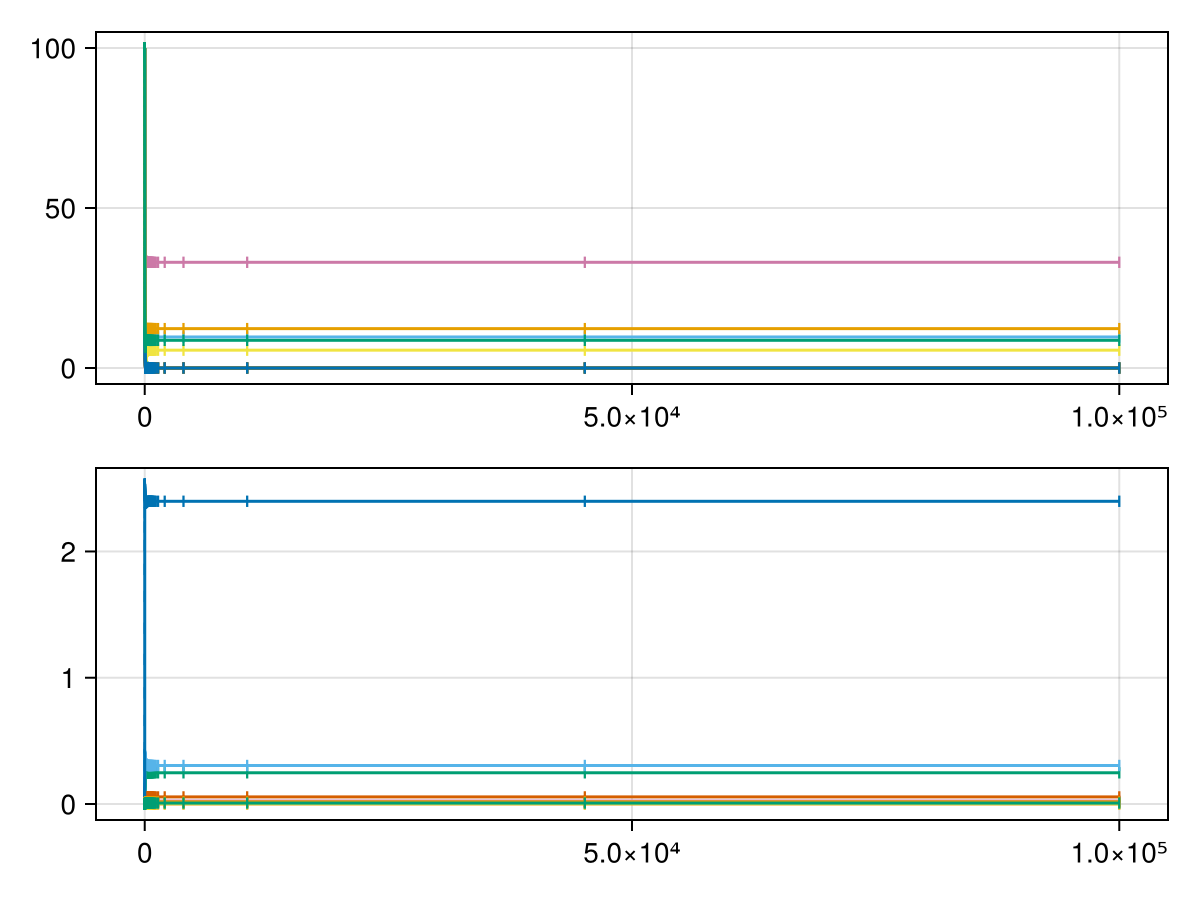

(sort(biom))[end - 5:end] = [6.1158140580953785e-16, 5.569039738257706, 8.645644547819733, 9.705536576786365, 12.306893415183016, 33.03067912821751]


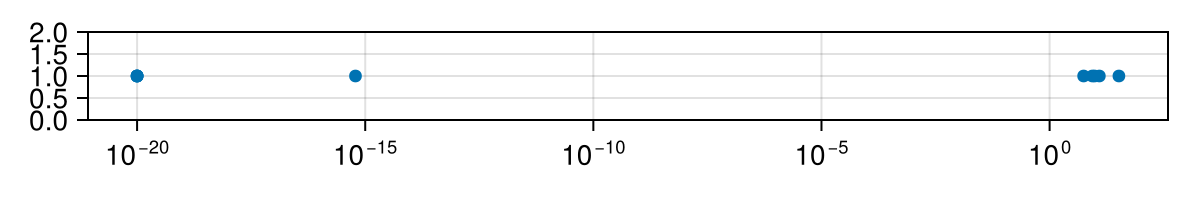

In [141]:
u0 = make_u0_smart(ps;
    # u0=[1., 1., 0., 0., 0.],
    u0rand=0.
)

p = make_mmicrm_problem(ps, u0, 100000)
s = solve(p)

check_mmicrmparams(ps)
# param_summary(p.p)

faa = plot_mmicrm_sol(s)
display(faa)
# display(GLMakie.Screen(), faa)
s[end];

ss = s[end]
biom = ss[1:get_Ns(ps)[1]]
@show sort(biom)[end-5:end]
scatter(clamp.(biom, 1e-20, Inf), fill(1, length(biom));
    axis=(; xscale=log10),
    figure=(; size=(600,100))
)

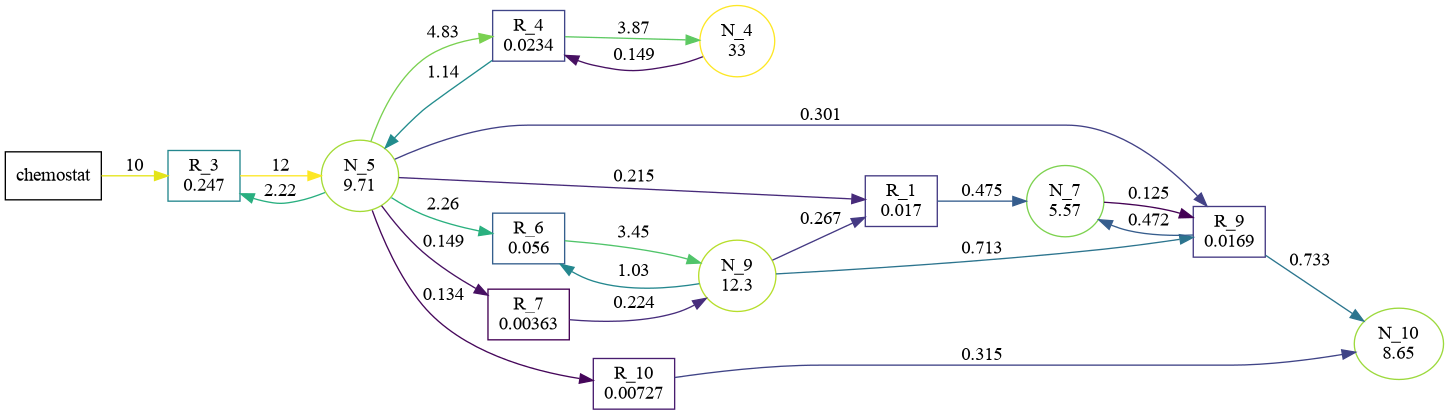

In [142]:
diagram_sfss_v3(ps, s[end];
    strain_threshold=1e-1,
    edge_threshold=1e-1,
    colorscale=log10,
    # cluster=true
)

In [143]:
usol = s.u[end]
#usol = sssol.u
#usol = Symbolics.value.(getindex.(symsol[2], 2))
show(maximum(abs, uninplace(mmicrmfunc!)(usol, ps, 0)))

5.773159728050814e-15

mrl = -2.33575201692873e-6


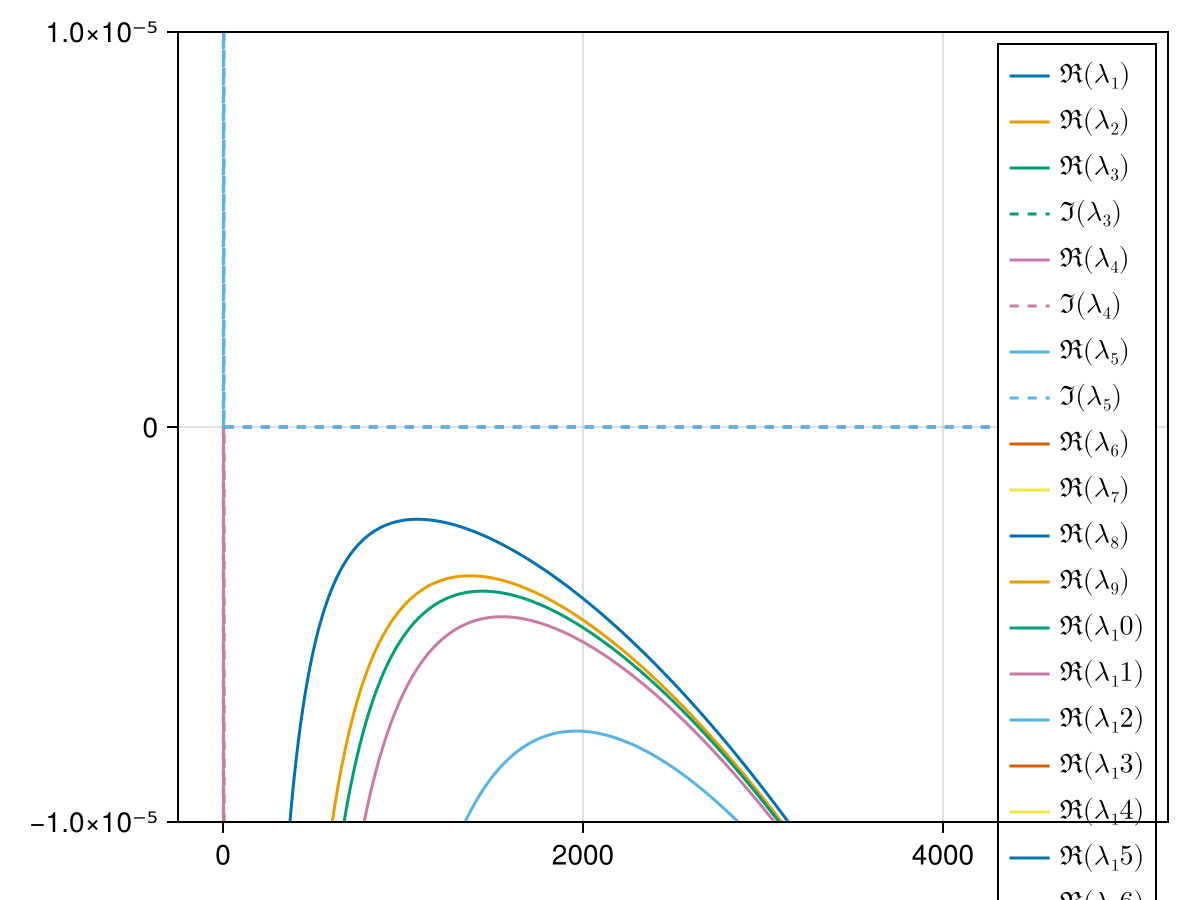

In [144]:
ks = LinRange(0., 5000., 10000)
lambda_func = linstab_make_k_func(ps, get_Ds(ps), usol)
full_linstab_func = linstab_make_k_func(ps, get_Ds(ps), usol; returnobj=:full)

lambdas = lambda_func.(ks)
mrl = maximum(x->maximum(real,x), lambdas)
@show mrl

faa = plot_linstab_lambdas(ks, lambdas)
ylims!(faa.axis, (-1e-5, 1e-5))
# xlims!(faa.axis, (0., 2.))
faa

## Testing the main functions

In [41]:
main1(;
    N=10,
    num_starts=1,
    num_prescreens=5,
    num_repeats=100,
    max_nomad_time=60,
    max_single_solver_time=5
)

┌ Warning: Getting less than 90.0% good runs!! cm is Dict(-1015 => 89, -1004 => 11)
└ @ Main ~/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode/cluster_env/runs/rg_nomad_unstructured2/job.jl:65
┌ Warning: Getting less than 90.0% good runs!! cm is Dict(-1015 => 89, -1 => 1, -1004 => 9, -23 => 1)
└ @ Main ~/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode/cluster_env/runs/rg_nomad_unstructured2/job.jl:65
┌ Warning: Getting less than 90.0% good runs!! cm is Dict(-1015 => 17, -1004 => 52, -23 => 31)
└ @ Main ~/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode/cluster_env/runs/rg_nomad_unstructured2/job.jl:65
┌ Warning: Could not find a satisfactory u0 during prescreening
└ @ Main ~/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode/cluster_env/runs/rg_nomad_unstructured2/job.jl:119


OBJ ( SOL ) BBE BBO
 -0       	(   1.736012   0        -12          0          0          0          1.635716   9.787315   9.827357   0          0.789204   0.174252 )	1 -0.000000 
 -0.020202	(   3.736012   0        -12          0         10          0          1.635716   9.787315  10          0          0.789204   0.174252 )	2 -0.020202 
 -0       	(   9.736012   0        -12          0         40          0          1.635716   9.787315  10          0          0.789204   0.174252 )	3 -0.000000 
 -0       	(   3.736012   0        -12          0         60          0          1.635716   9.787315  10          0          0.789204   0.174252 )	4 -0.000000 
 -0       	(   8.736012   0        -12          0         10          0          1.635716   9.787315  10          0          0.789204   0.174252 )	5 -0.000000 
 -0       	(   3.736012   1        -12          0         10          0          1.635716   9.787315  10          0          0.789204   0.174252 )	6 -0.000000 
 -0       	(   3.736

1-element Vector{Any}:
 Any[([-9.473911197357424, 0.0, -12.0, 0.0, 0.0, 0.0, 8.648828034688892, 4.991961055611224, 3.0207496970309258, 0.0, 0.8021003618851059, 0.8486607188400613], -1.0, Dict(-1015 => 89, -1004 => 11)), ([-2.393112450636437, 0.0, -12.0, 0.0, 0.0, 0.0, 5.145456536666064, 6.796117468165095, -9.508118935658715, 0.0, 0.5398876061092748, 0.03348710384727083], 0.0, Dict(1 => 100)), ([-7.760219073183525, 0.0, -12.0, 0.0, 0.0, 0.0, 7.876054815788489, 3.118121664549771, -4.762040086025436, 0.0, 0.8801161952248524, 0.6839169164988529], -1.0, Dict(-1015 => 89, -1 => 1, -1004 => 9, -23 => 1)), ([-9.264576585041166, 0.0, -12.0, 0.0, 0.0, 0.0, 0.07371448084045662, 2.555676443177932, -4.842253249729174, 0.0, 0.6128565351935596, 0.7786126855220712], -1.0, Dict(-1015 => 17, -1004 => 52, -23 => 31)), ([1.7360123648334174, 0.0, -12.0, 0.0, 0.0, 0.0, 1.6357158450522857, 9.787315028722833, 9.827356840923013, 0.0, 0.7892037936277292, 0.1742520337873078], 0.0, Dict(1 => 98, 23 => 2)), ([1.73

# Looking at data 1 (which is entirely wrong!!)

## Simpler run

In [115]:
ts = load_object("./N10_unic_Appreciative-Charcoal-Jerboa.jld2");
pnames = ["me", "la", "lb", "ce", "sr", "sb"];
length(ts)

5

In [124]:
find_best_sols(ts; pnames)

Row,obj,me,la,lb,ce,sr,sb,cm
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Any
1,0.0606061,0.9177,50.1234,10.1454,-3.29485,1.0,0.540922,"Dict(2=>6, -1004=>1, 1=>91, 101=>2)"
2,0.12,1.10786,0.0035775,2.5075e-10,1.93596,0.489438,0.593101,"Dict(2=>12, 1=>88)"
3,0.04,2.27545,0.660769,30.2552,-1.43885,1.0,1.0,"Dict(2=>4, 1=>96)"
4,0.1,0.153364,11.5271,11.0197,-0.853246,0.68081,0.0489626,"Dict(2=>10, 1=>90)"
5,0.0909091,1.22091,1.31655,0.247604,-0.0962286,0.642956,0.524773,"Dict(-1015=>1, 2=>9, 1=>90)"


In [117]:
t = ts[2]

faa = plot_trajectory(t;
    pnames,
    vs_coloring=:obj,
    tfilter=(x->x[2] >= 0.),
    vs_kwargs=(;
        colorrange=(0., 0.1)
    ),
)
display(GLMakie.Screen(), faa.figure)

GLMakie.Screen(...)

In [118]:
faa = plot_all_trajectories_obj2(ts;
    pnames,
    vs_coloring=:obj,
    # tfilter=(x->x[2] >= 0.01),
    vs_kwargs=(;
        colorrange=(0., 0.1)
    ),
)
display(GLMakie.Screen(), faa.figure)

GLMakie.Screen(...)

## Full params run

In [107]:
ts = load_object("./N10_unic_Focused-Lime-Bobcat.jld2")
pnames = ["me", "mev", "Dse", "Dsev", "Dre", "Drev", "la", "lb", "ce", "cev", "sr", "sb"]
length(ts)

5

In [109]:
find_best_sols(ts; pnames)

Row,obj,me,mev,Dse,Dsev,Dre,Drev,la,lb,ce,cev,sr,sb
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.00800801,6.08918,1.0,-12.0,0.0,0.0,0.0,0.463443,0.587665,-0.465867,0.0,0.815211,0.919549
2,0.0120968,6.35698,0.0,-2.0,1.0,10.0,1.0,10.0,10.5861,-1.0,1.0,0.178453,0.311519
3,0.0750751,1.95366,0.1484,-11.971,0.0033,10.144,0.0,0.037,5.008,5.55791,0.2343,0.535163,0.894424
4,0.011,0.896081,0.53,8.0,0.56,-0.0,0.05,6.98803,5.75765,0.878983,0.56,0.712156,0.832131
5,0.0401606,0.555323,0.47,-2.0,1.47,0.0,0.47,5.63196,0.0,-0.351803,0.2,0.935161,0.797478


In [110]:
t = ts[2]

faa = plot_trajectory(t;
    pnames,
    vs_coloring=:obj,
    tfilter=(x->x[2] >= 0.),
    vs_kwargs=(;
        colorrange=(0., 0.1)
    ),
)
display(GLMakie.Screen(), faa.figure)

GLMakie.Screen(...)

In [114]:
faa = plot_all_trajectories_obj2(ts;
    pnames,
    vs_coloring=:obj,
    # tfilter=(x->x[2] >= 0.01),
    vs_kwargs=(;
        colorrange=(0., 0.1)
    ),
)
rowgap!(faa.figure.layout, 0.)
colgap!(faa.figure.layout, 0.)
display(GLMakie.Screen(), faa.figure)

GLMakie.Screen(...)